# Board Game Review Prediction

### Importing Libraries and Loading the Data

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')
(81312, 20)


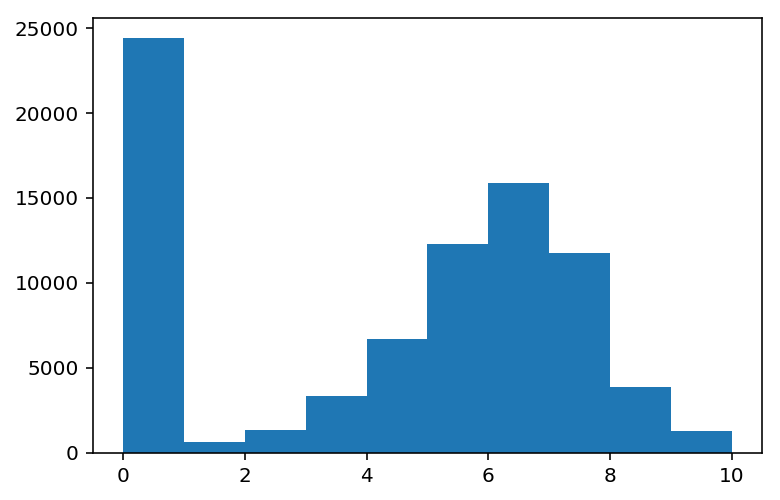

In [7]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


games = pandas.read_csv("games.csv")

print(games.columns)
print(games.shape)

plt.hist(games["average_rating"])

plt.show()

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

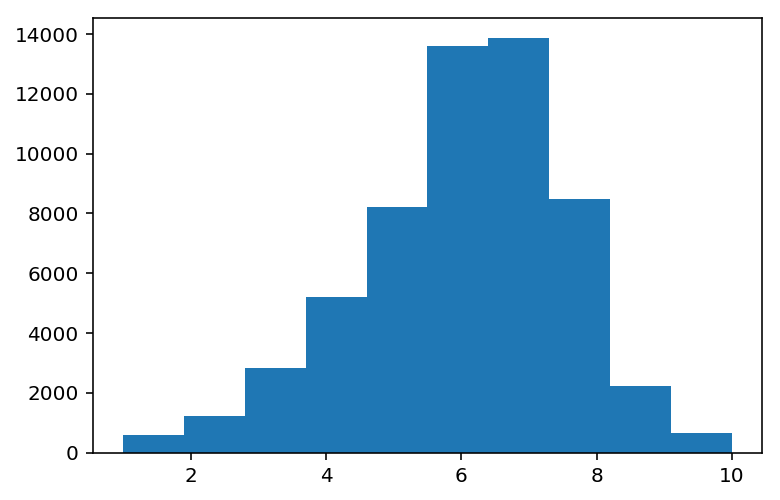

In [8]:
print(games[games["average_rating"] == 0].iloc[0])

print(games[games["average_rating"] > 0].iloc[0])
games = games[games["users_rated"] > 0]
games = games.dropna(axis=0)
plt.hist(games["average_rating"])

plt.show()

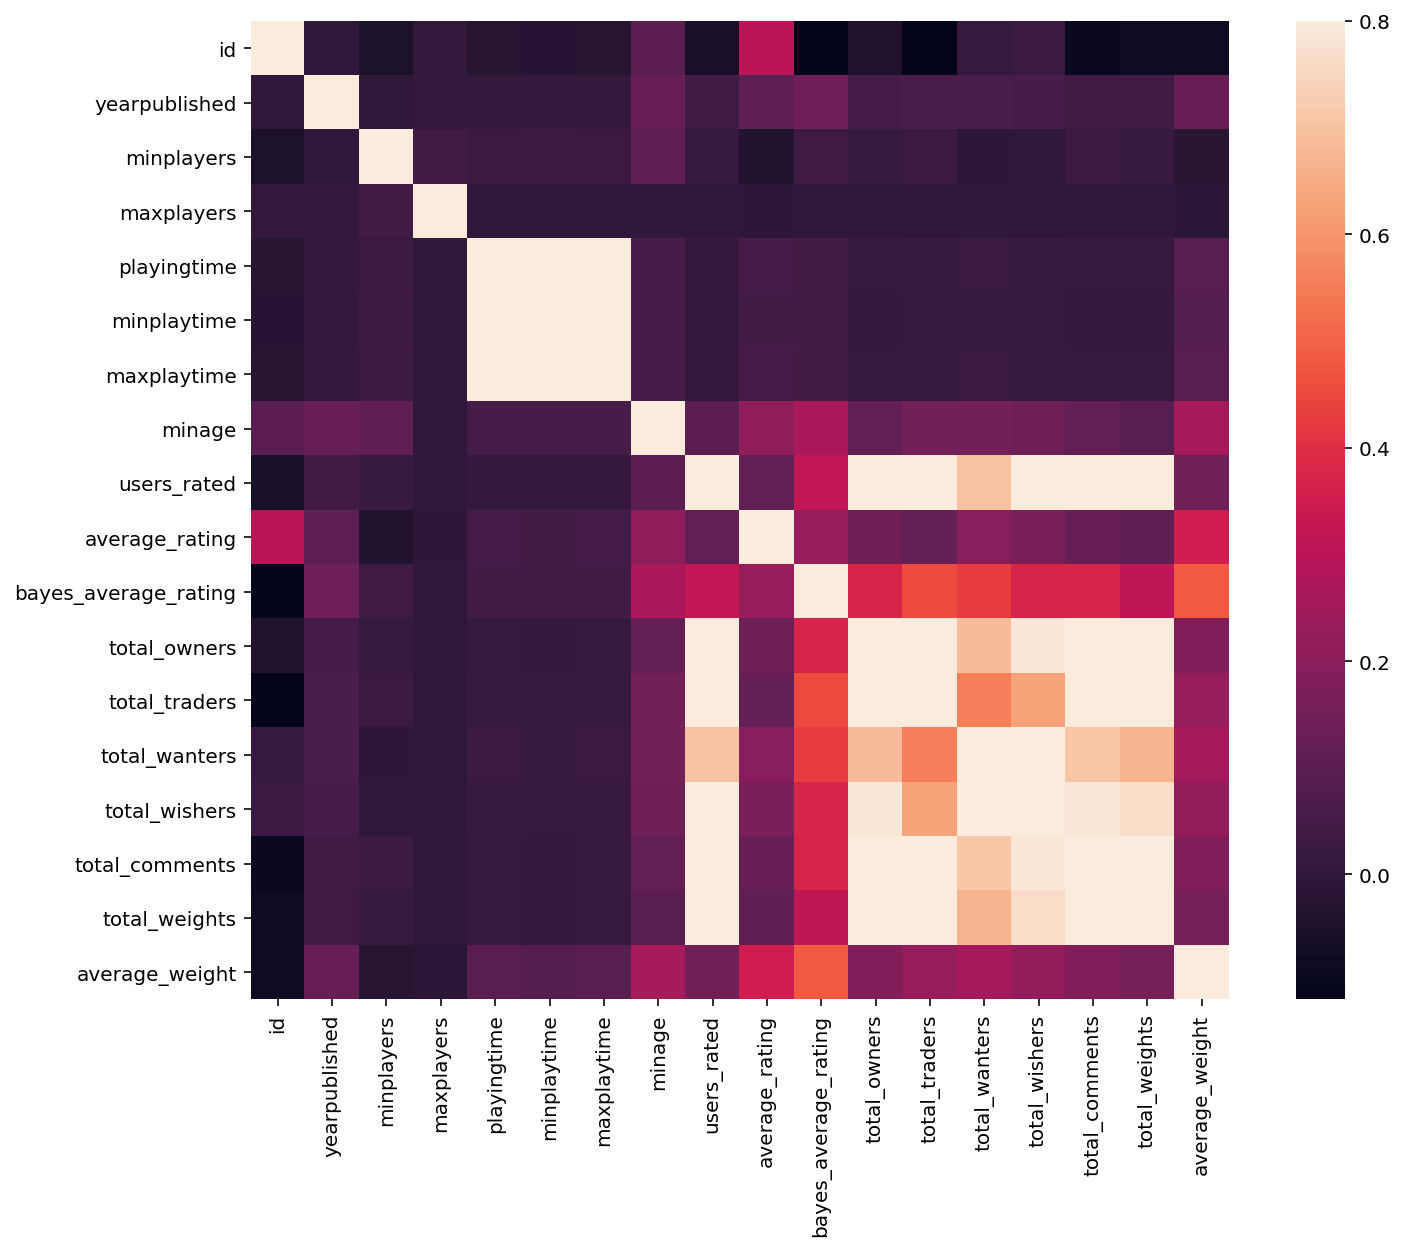

In [9]:
# correlation matrix
cormat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cormat, vmax=.8, square=True);
plt.show()

In [11]:
columns = games.columns.tolist()
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]
target = "average_rating"

In [6]:
train = games.sample(frac=0.8, random_state=1)

test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [9]:
# linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train[columns], train[target])

from sklearn.metrics import mean_squared_error

predictions = model.predict(test[columns])
mean_squared_error(predictions, test[target])

2.078819032629324

In [10]:
# RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

model.fit(train[columns], train[target])
predictions = model.predict(test[columns])
mean_squared_error(predictions, test[target])

1.4458564605687358